# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
import datetime

In [ ]:
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [ ]:
lat_lngs = []
cities = []

while len(cities) < 500:
    # Create a set of random lat and lng combinations
    lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
    lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
    lat_lngs = zip(lats, lngs)

    # Identify nearest city for each lat, lng combination
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

        # If the city is unique, then add it to a our cities list
        if city not in cities:
            cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
        

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [13]:
print("Beginning Data Retrieval\n-----------------------------\n")

# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

responses = []

i = 0
for city in cities:
    i = i + 1
    response = requests.get(query_url + city).json()
    if response['cod'] == 200:
        print(f"Processing Record {i} | {city}")
        responses.append(response)
    else:
        print("City not found. Skipping...")
print("-----------------------------\nData Retrieval Complete\n-----------------------------")

Beginning Data Retrieval
-----------------------------

Processing Record 1 | bredasdorp
Processing Record 2 | ponta do sol
Processing Record 3 | avarua
Processing Record 4 | jamestown
Processing Record 5 | moberly
Processing Record 6 | saint-philippe
Processing Record 7 | arraial do cabo
Processing Record 8 | ilulissat
Processing Record 9 | nishihara
Processing Record 10 | kyra
Processing Record 11 | mazyr
Processing Record 12 | castro
Processing Record 13 | vaini
Processing Record 14 | torbay
Processing Record 15 | albany
Processing Record 16 | kohat
Processing Record 17 | bireun
Processing Record 18 | hobart
Processing Record 19 | nago
Processing Record 20 | mahebourg
Processing Record 21 | hobyo
City not found. Skipping...
Processing Record 23 | langsa
City not found. Skipping...
Processing Record 25 | new norfolk
City not found. Skipping...
Processing Record 27 | tiarei
Processing Record 28 | poli
Processing Record 29 | hualmay
Processing Record 30 | saskylakh
Processing Record 31

Processing Record 260 | caruray
Processing Record 261 | pacific grove
Processing Record 262 | piney green
Processing Record 263 | nouadhibou
Processing Record 264 | babu
Processing Record 265 | palembang
Processing Record 266 | san patricio
Processing Record 267 | santa maria
Processing Record 268 | naifaru
Processing Record 269 | tuktoyaktuk
Processing Record 270 | lasa
Processing Record 271 | moroni
Processing Record 272 | okha
Processing Record 273 | isangel
Processing Record 274 | ostrovnoy
City not found. Skipping...
Processing Record 276 | kamenka
Processing Record 277 | jiuquan
Processing Record 278 | sayat
Processing Record 279 | bacalar
Processing Record 280 | kalmunai
Processing Record 281 | port-gentil
Processing Record 282 | fort wellington
Processing Record 283 | taoudenni
Processing Record 284 | derzhavinsk
Processing Record 285 | ahipara
Processing Record 286 | meadow lake
City not found. Skipping...
Processing Record 288 | saint-augustin
Processing Record 289 | surt
Cit

Processing Record 512 | nome
Processing Record 513 | ust-maya
Processing Record 514 | vangaindrano
City not found. Skipping...
Processing Record 516 | pala
Processing Record 517 | honningsvag
Processing Record 518 | amahai
Processing Record 519 | kargil
Processing Record 520 | port keats
Processing Record 521 | ulenurme
Processing Record 522 | pak phanang
Processing Record 523 | wenatchee
Processing Record 524 | itupeva
Processing Record 525 | igrim
Processing Record 526 | svetlaya
Processing Record 527 | pangai
Processing Record 528 | rio cuarto
City not found. Skipping...
Processing Record 530 | guymon
Processing Record 531 | chachapoyas
Processing Record 532 | sur
Processing Record 533 | qaqortoq
Processing Record 534 | vilyuysk
Processing Record 535 | north vanlaiphai
Processing Record 536 | kirakira
Processing Record 537 | sao joao da barra
Processing Record 538 | moscow
Processing Record 539 | talcahuano
Processing Record 540 | virginia beach
Processing Record 541 | kinablangan
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
city_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []

for resp in responses:
    city_list.append(resp['name'])
    cloudiness_list.append(resp['clouds']['all'])
    country_list.append(resp['sys']['country'])
    date_list.append(resp['dt'])
    humidity_list.append(resp['main']['humidity'])
    lat_list.append(resp['coord']['lat'])
    lng_list.append(resp['coord']['lon'])
    max_temp_list.append(resp['main']['temp_max'])
    wind_speed_list.append(resp['wind']['speed'])
    
city_data_dict = {
    'City': city_list,
    'Cloudiness': cloudiness_list,
    'Country': country_list,
    'Date': date_list,
    'Humidity': humidity_list,
    'Lat': lat_list,
    'Lng': lng_list,
    'Max Temp': max_temp_list,
    'Wind Speed': wind_speed_list
}

city_data_df = pd.DataFrame(city_data_dict)

city_data_df.to_csv(output_data_file, index=False)



In [15]:
city_data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Bredasdorp,0,ZA,1615070464,77,-34.5322,20.0403,64.40,8.05
1,Ponta do Sol,40,PT,1615070490,67,32.6667,-17.1000,60.80,19.57
2,Avarua,75,CK,1615070468,78,-21.2078,-159.7750,80.60,8.05
3,Jamestown,90,US,1615070470,95,42.0970,-79.2353,26.01,9.89
4,Moberly,1,US,1615070710,33,39.4184,-92.4382,60.80,6.35


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
test_stats = city_data_df["Humidity"].describe(include = "all")
print("By inspection, the maximum humidity value is 100, so there are no values greater than 100 in our data!")
test_stats

By inspection, the maximum humidity value is 100, so there are no values greater than 100 in our data!


count    570.000000
mean      72.728070
std       21.012711
min       10.000000
25%       63.000000
50%       78.000000
75%       88.000000
max      100.000000
Name: Humidity, dtype: float64

In [9]:
#  Get the indices of cities that have humidity over 100%.


In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

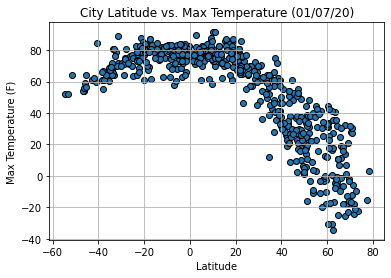

In [17]:
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.title('City Latitude vs. Max Temperature (01/07/20)')
plt.savefig('CityLatitudeVsMaxTemp.png')

In [12]:
plot is looking at the relationships between the latitide of a city and maximun temperature reported

SyntaxError: invalid syntax (<ipython-input-12-f9fe2a08ed9d>, line 1)

## Latitude vs. Humidity Plot

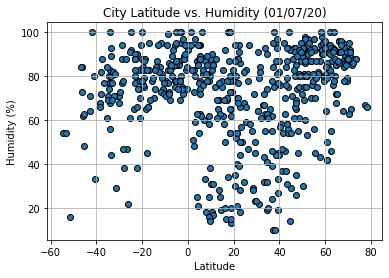

In [18]:
 x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.title('City Latitude vs. Humidity (01/07/20)')
plt.savefig('CityLatitudeVsHumidity.png')

In [ ]:
plot is looking at the relationships between the latitide of a city and Humidity reported

## Latitude vs. Cloudiness Plot

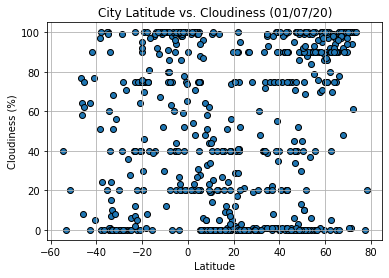

In [19]:
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.title('City Latitude vs. Cloudiness (01/07/20)')
plt.savefig('CityLatitudeVsCloudiness.png')

In [ ]:
plot is looking at the relationships between the latitide of a city and % cloudiness reported

## Latitude vs. Wind Speed Plot

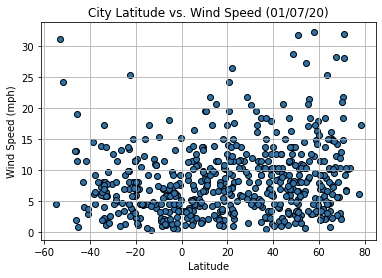

In [20]:
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values, y_values, edgecolors='black')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.title('City Latitude vs. Wind Speed (01/07/20)')
plt.savefig('CityLatitudeVsWindSpeed.png')

In [ ]:
plot is looking at the relationships between the latitide of a city and windspeed reported

## Linear Regression

In [22]:
def linear_reg_plot(df, title_name, y_column_name, y_label, file_name, xy):
    x_values = df['Lat']
    y_values = df[y_column_name]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq,xy,fontsize=15,color="red")
    plt.title(title_name)
    
    print(f"The r-squared is: {rvalue}")
    
    plt.savefig(file_name)

In [23]:
 # Create Northern and Southern Hemisphere DataFrames
northern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] > 0, :]
southern_hemisphere_df = city_data_df.loc[city_data_df['Lat'] < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8800593433167554


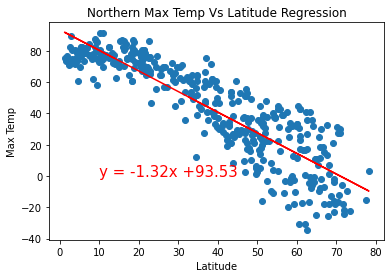

In [24]:
linear_reg_plot(northern_hemisphere_df, 'Northern Max Temp Vs Latitude Regression', 'Max Temp', 'Max Temp', 'NorthernMaxTempVsLatitudeReg.png', (10,0))

In [ ]:
plot is showing a negative relationship between latitude of a city in the northern hemisphere and maximum temperature reported

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5446969368927062


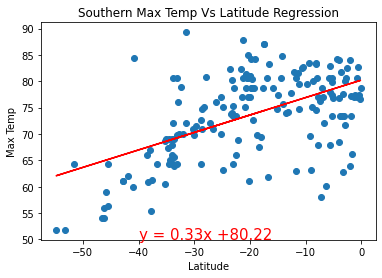

In [25]:
 linear_reg_plot(southern_hemisphere_df, 'Southern Max Temp Vs Latitude Regression', 'Max Temp', 'Max Temp', 'SouthernMaxTempVsLatitudeReg.png', (-40,50))

In [ ]:
plot is showing a positive relationship between latitude of a city in the southern hemisphere and maximum temperature reported

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3140372811537314


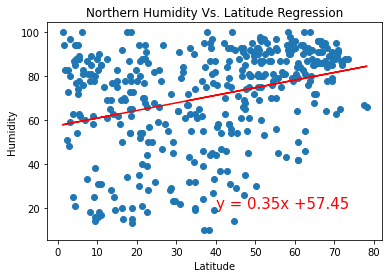

In [26]:
linear_reg_plot(northern_hemisphere_df, 'Northern Humidity Vs. Latitude Regression', 'Humidity', 'Humidity', 'NorthernHumidityVsLatitudeReg.png', (40,20))

In [ ]:
plot is showing a positive relationship between latitude of a city in the northern hemisphere and humidity reported

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.4143768484585894


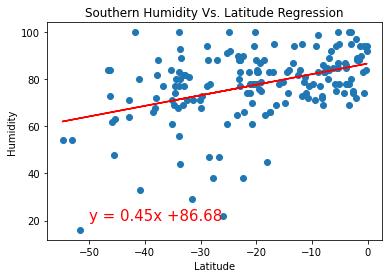

In [27]:
linear_reg_plot(southern_hemisphere_df, 'Southern Humidity Vs. Latitude Regression', 'Humidity', 'Humidity', 'SouthernHumidityVsLatitudeReg.png', (-50,20))

In [ ]:
plot is showing a positive relationship between latitude of a city in the southern hemisphere and humudity reported

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.3802585726749843


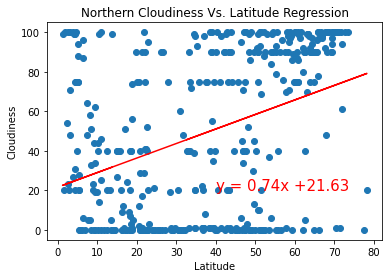

In [28]:
 linear_reg_plot(northern_hemisphere_df, 'Northern Cloudiness Vs. Latitude Regression', 'Cloudiness', 'Cloudiness', 'NorthernCloudinessVsLatitudeReg.png', (40,20))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.35828020624749135


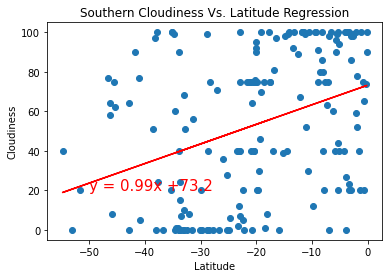

In [29]:
 linear_reg_plot(southern_hemisphere_df, 'Southern Cloudiness Vs. Latitude Regression', 'Cloudiness', 'Cloudiness', 'SouthernCloudinessVsLatitudeReg.png', (-50,20))

In [ ]:
plot is showing a positive relationship between latitude of a city in the southern hemisphere and cloudiness reported

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.14126517438751005


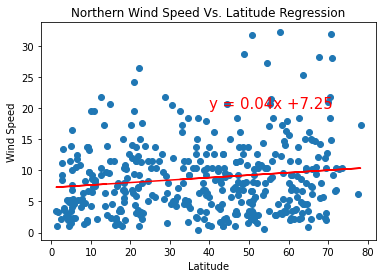

In [30]:
linear_reg_plot(northern_hemisphere_df, 'Northern Wind Speed Vs. Latitude Regression', 'Wind Speed', 'Wind Speed', 'NorthernWindSpeedVsLatitudeReg.png', (40,20))

In [ ]:
plot is showing a positive relationship between latitude of a city in the northern hemisphere and windspeed reported

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2415600555238909


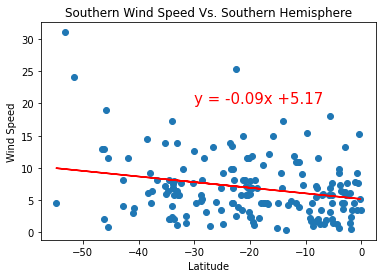

In [31]:
linear_reg_plot(southern_hemisphere_df, 'Southern Wind Speed Vs. Southern Hemisphere', 'Wind Speed', 'Wind Speed', 'SouthernWindSpeedVsLatitudeReg.png', (-30,20))

In [ ]:
plot is showing a negative relationship between latitude of a city in the southern hemisphere and windspeed reported